In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

connection = engine.connect()

In [7]:
# reflect an existing database into a new model
base = automap_base()


# reflect the tables
base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [23]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [27]:
# Find the most recent date in the data set.

most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent)
first = session.query(measurement).first()
first.__dict__

('2017-08-23',)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc5780a9f40>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

Text(0, 0.5, 'Inches of Percipitation')

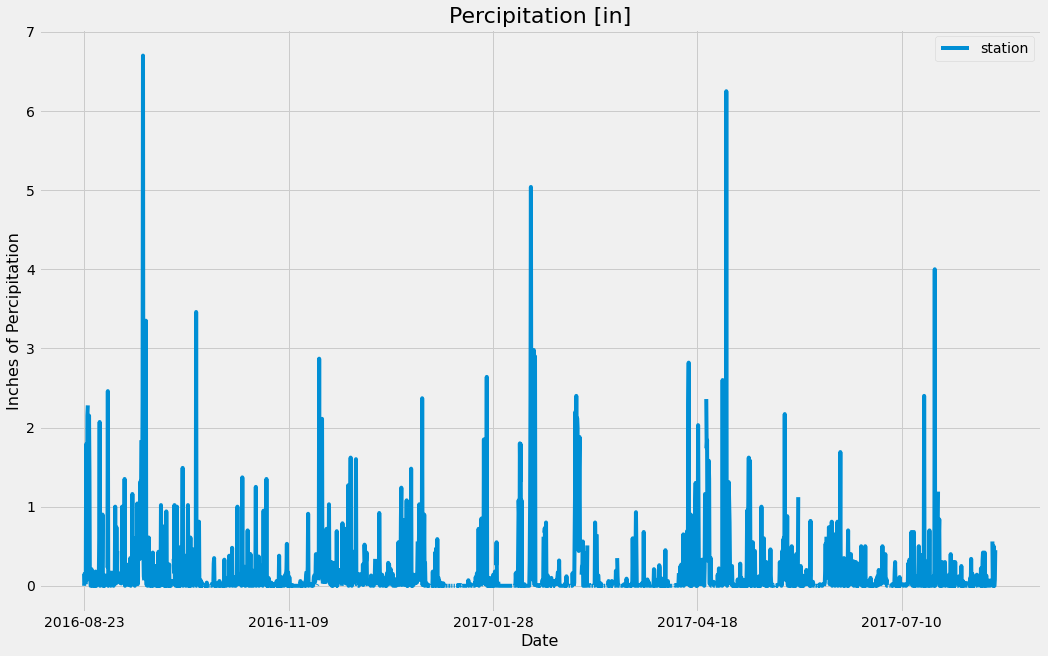

In [67]:
# Perform a query to retrieve the data and precipitation scores

data = session.query(measurement.date, measurement.prcp, measurement.station).\
            filter(measurement.date >= '2016-08-23').\
            order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(data, columns =['date', 'Station', 'prcp'])
df = df.set_index('date')

# Sort the dataframe by date

df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize = (16,10))
plt.title('Percipitation [in]',
         fontsize = 22)
         
plt.xlabel('Date',
          fontsize = 16)
          
plt.ylabel('Inches of Percipitation',
          fontsize = 16)
         

In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,station
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [73]:
# Design a query to calculate the total number stations in the dataset

session.query(measurement.station).distinct().count()

9